### Challenge : AGE, GENDER AND ETHNICITY (FACE DATA)

Il s'agit d'un grand challenge lancé par @Nipun_Arora. Le but général est de trouver une solution Deep Learning qui permettre d'une part de prédire le sexe (Homme, Femme) et l'origine ethnique (Africain, asiatique, Europeen ..) de la personne. Et d'autre part de prédire l'age de la personne.

[Ici tu vas trouver la base de données ainsi la description du challenge, Click Here](https://www.kaggle.com/nipunarora8/age-gender-and-ethnicity-face-data-csv)

Donc il s'agit de deux problèmes classique : classification et régression.

- Une classification en fonction de genre : classification binaire
- Une classification en fonction de la race : classification multi-classes
- Une régression par rapport à l'age de la personne.

Mais avant d'entamer à répondre de 3 sous problèmes, on va tout d'abord decrire la base de données

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

la base de données est stockée dans un fichier CSV. il contient 5 colonnes : 
* age : represente l'age de la personne (float)
* ethnicity : la race de la personne    (int) 
* gender : le sexe de la personne       (int)
* img_name : l'id de l'image            (txt)
* pixel : la liste des pixels de l'image (liste de int)

En total, nous avons 23705 échantillons 

In [2]:
df = pd.read_csv("age_gender.csv")
df['pixels'] = df.apply(lambda row:   list(map(int, row['pixels'].split(' '))) , axis=1)
df.describe()

,age,ethnicity,gender
count,23705.000000,23705.000000,23705.000000
mean,33.300907,1.269226,0.477283
std,19.885708,1.345638,0.499494
min,1.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000
50%,29.000000,1.000000,0.000000
75%,45.000000,2.000000,1.000000
max,116.000000,4.000000,1.000000


Pour la colonne de pixels, on a transformé la forme précédente (chaine de caractères) en un vecteur des entiers (0 - 255) qui représente la valeur de pixel

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23705 entries, 0 to 23704
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        23705 non-null  int64 
 1   ethnicity  23705 non-null  int64 
 2   gender     23705 non-null  int64 
 3   img_name   23705 non-null  object
 4   pixels     23705 non-null  object
dtypes: int64(3), object(2)
memory usage: 926.1+ KB


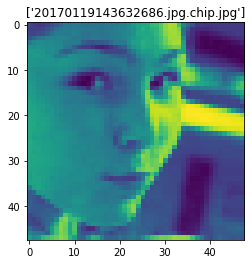

In [4]:
img = df['pixels'].sample().values[0]
name_img = df['img_name'].sample().values

n = 48
img = np.array(img).reshape(n, -1)
#img = np.array([int(e) for e in img.values[0].split()]).reshape(n, -1)
# plotting the image
plt.title(name_img)
plt.imshow(img, interpolation='nearest')

In [5]:
X = np.vstack(df['pixels'].values)
print("Shape dataset :", X.shape)

Shape dataset : (23705, 2304)


**Visualisation by Ethnicity**

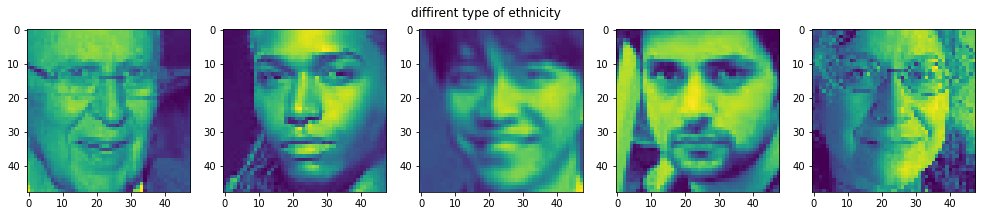

In [6]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(17, 3))

fig.suptitle('diffirent type of ethnicity')

n = 48


img = df['pixels'][df.ethnicity==0].sample().values[0]
img = np.array(img).reshape(n, -1)
ax1.imshow(img, interpolation='nearest')

img = df['pixels'][df.ethnicity==1].sample().values[0]
img = np.array(img).reshape(n, -1)
ax2.imshow(img, interpolation='nearest')

img = df['pixels'][df.ethnicity==2].sample().values[0]
img = np.array(img).reshape(n, -1)
ax3.imshow(img, interpolation='nearest')

img = df['pixels'][df.ethnicity==3].sample().values[0]
img = np.array(img).reshape(n, -1)
ax4.imshow(img, interpolation='nearest')

img = df['pixels'][df.ethnicity==4].sample().values[0]
img = np.array(img).reshape(n, -1)
ax5.imshow(img, interpolation='nearest')

In [7]:
name_ethnicity = ['Europeen', 'African', 'East-Asian', 'Indian', 'Latino']

<BarContainer object of 5 artists>

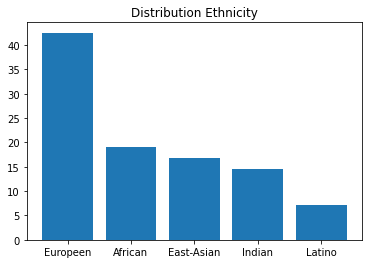

In [8]:
plt.title("Distribution Ethnicity")
plt.bar(name_ethnicity, df.ethnicity.value_counts()/len(df.ethnicity)*100)

**Visualisation By gender**

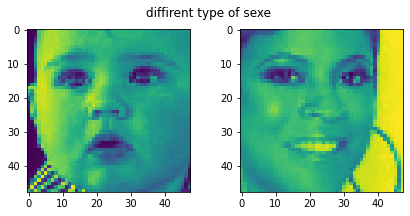

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 3))

fig.suptitle('diffirent type of sexe')

n = 48 # taille de l'image

img = df['pixels'][df.gender==0].sample().values[0]
img = np.array(img).reshape(n, -1)
ax1.imshow(img, interpolation='nearest')

img = df['pixels'][df.gender==1].sample().values[0]
img = np.array(img).reshape(n, -1)
ax2.imshow(img, interpolation='nearest')

In [10]:
name_gender = ['Male', 'Female']

<BarContainer object of 2 artists>

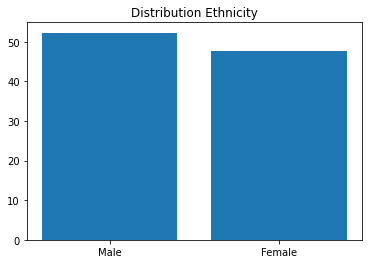

In [11]:
plt.title("Distribution Ethnicity")
plt.bar(name_gender, df.gender.value_counts()/len(df.ethnicity)*100)

**Preprocessing dataset**

In [12]:
X = X /225

**Feature extraction**

In [13]:
# example of loading the keras facenet model
from keras.models import load_model, Model
# load the model
model = load_model('facenet_keras.h5')
# summarize input and output shape
model.summary()

Model: "inception_resnet_v1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
Conv2d_1a_3x3 (Conv2D)          (None, 79, 79, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
Conv2d_1a_3x3_BatchNorm (BatchN (None, 79, 79, 32)   96          Conv2d_1a_3x3[0][0]              
__________________________________________________________________________________________________
Conv2d_1a_3x3_Activation (Activ (None, 79, 79, 32)   0           Conv2d_1a_3x3_BatchNorm[0][0]    
________________________________________________________________________________

In [14]:
import cv2

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


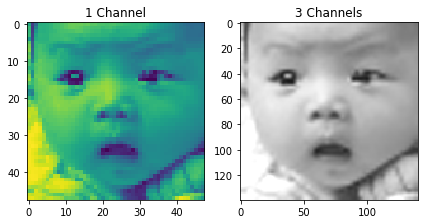

In [16]:
img_1C = X[1].reshape(n,n)

# add 3 channels
x = cv2.resize(img_1C, dsize=(140, 140), interpolation=cv2.INTER_CUBIC)
x = x.reshape(1,x.shape[0],x.shape[1],1)
img_3C = np.repeat(x, 3, -1)

# plot figures
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(7,4))

ax1.title.set_text('1 Channel')
ax1.imshow(img_1C, interpolation='nearest')
ax2.title.set_text('3 Channels')
ax2.imshow(img_3C[0], interpolation='nearest')

In [17]:
from keras.applications.vgg16  import preprocess_input
def compute_features(model, x):
    # reshape
    t = X[0].reshape(n, n)
    # resize
    x = cv2.resize(x, dsize=(140, 140), interpolation=cv2.INTER_CUBIC)
    # reshape
    x = x.reshape(1,x.shape[0],x.shape[1],1)
    # add 3 channels
    x = np.repeat(x, 3, -1)
    #compute features
    features = model.predict(x)
    return features

In [18]:
couche = 'Bottleneck_BatchNorm'
Extractor = Model(inputs = model.input, outputs = model.get_layer(couche).output)

In [19]:
Extractor.outputs

[<tf.Tensor 'Bottleneck_BatchNorm/batchnorm/add_1:0' shape=(None, 128) dtype=float32>]

In [20]:
feat = [compute_features(Extractor, x)[0] for x in X]


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


NameError: name 'Features' is not defined

In [21]:
#transform to a numpy array 
Features = np.array(feat)
print("the shape of your features matrix is :",Features.shape)
np.savez_compressed('features.npz', X = Features)

the shape of your features matrix is : (23705, 128)


In [ ]:
#Features.shape

In [ ]:
#Features.tofile('foo.csv',sep=',',format='%.3f')
#np.savetxt("features.csv", Features, delimiter=",")

In [ ]:
#Features[0]